In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def get_simulation_metafile_path(img_id, eps_am, resolution, Wa_n=1e-3, Wa_p=1, kr=1, gamma=15, refined=False):
    if refined:
        return os.path.join("output/reaction_distribution/470-470-45/15-30/", str(int(img_id)), str(eps_am), str(resolution), f"{Wa_n}-{Wa_p}-{kr}", str(gamma), "simulation.json")
    else:
        return os.path.join("output/reaction_distribution/470-470-45/15-30/", str(int(img_id)), str(eps_am), "unrefined", str(resolution), f"{float(Wa_n)}-{float(Wa_p)}-{float(kr)}", str(gamma), "simulation.json")

In [3]:
def read_simulation_metafile(metafile_path):
    with open(metafile_path, "r") as fp:
        return json.load(fp)

In [4]:
df_rows = []
vol_fracs = np.linspace(0.1, 0.6, num=6, dtype=np.float16)
image_ids = [11]
wagner_nums = [0.1, 1.0, 10.0]
krs = [0.01, 1.0, 100.0]

for eps_am in vol_fracs:
    for Wa_p in wagner_nums:
        for img_id in image_ids:
            for kr in krs:
                sim_metafile = get_simulation_metafile_path(img_id=img_id, eps_am=eps_am, resolution=5.0, kr=kr, Wa_p=Wa_p)
                try:
                    row_data = read_simulation_metafile(sim_metafile)
                except FileNotFoundError:
                    continue
                row_data["eps_am"] = eps_am
                df_rows.append(row_data)

df = pd.DataFrame(df_rows, dtype=float)

output/reaction_distribution/470-470-45/15-30/11/0.1/unrefined/5.0/0.001-0.1-0.01/15/simulation.json
output/reaction_distribution/470-470-45/15-30/11/0.1/unrefined/5.0/0.001-0.1-1.0/15/simulation.json
output/reaction_distribution/470-470-45/15-30/11/0.1/unrefined/5.0/0.001-0.1-100.0/15/simulation.json
output/reaction_distribution/470-470-45/15-30/11/0.1/unrefined/5.0/0.001-1.0-0.01/15/simulation.json
output/reaction_distribution/470-470-45/15-30/11/0.1/unrefined/5.0/0.001-1.0-1.0/15/simulation.json
output/reaction_distribution/470-470-45/15-30/11/0.1/unrefined/5.0/0.001-1.0-100.0/15/simulation.json
output/reaction_distribution/470-470-45/15-30/11/0.1/unrefined/5.0/0.001-10.0-0.01/15/simulation.json
output/reaction_distribution/470-470-45/15-30/11/0.1/unrefined/5.0/0.001-10.0-1.0/15/simulation.json
output/reaction_distribution/470-470-45/15-30/11/0.1/unrefined/5.0/0.001-10.0-100.0/15/simulation.json
output/reaction_distribution/470-470-45/15-30/11/0.2/unrefined/5.0/0.001-0.1-0.01/15/sim

In [5]:
df.head()

,Negative Wagner Number,Positive Wagner Number,Negative Overpotential [V],Positive Overpotential [V],Open Circuit Potential (OCP) [V],Voltage,interior penalty (gamma),interior penalty kr-modified (gamma),ionic to electronic conductivity ratio (kr),average potential left [V],...,Current at negative am - electrolyte boundary,Current at electrolyte - positive am boundary,Current at right boundary,Current at insulated boundary,stdev i positive charge transfer,stdev i positive charge transfer (normalized),solver atol,solver rtol,Total resistance [Ω.cm2],eps_am
0,1.0e-03,1.0e-01,-7.40e-07,1.01e-07,0.00e+00,1.0,15,100,0.01,-7.40e-07,...,5.15e-06 A,1.13e-05 A,8.09e-06 A,5.24e-11 A,1.57e+01 A/m2,1.56e+00,1.000000e-15,0.000001,791.388058,0.099976
1,1.0e-03,1.0e-01,-5.27e-05,3.12e-07,0.00e+00,1.0,15,100,1.00,-5.27e-05,...,3.19e-04 A,5.34e-04 A,5.31e-04 A,2.29e-07 A,4.59e+02 A/m2,9.65e-01,1.000000e-15,0.000001,12.042709,0.099976
2,1.0e-03,1.0e+00,-5.79e-07,9.76e-08,0.00e+00,1.0,15,100,0.01,-5.79e-07,...,3.70e-06 A,7.43e-06 A,6.00e-06 A,4.22e-11 A,4.93e+00 A/m2,7.43e-01,1.000000e-15,0.000001,1066.693331,0.099976
3,1.0e-03,1.0e+00,-4.58e-05,3.16e-07,0.00e+00,1.0,15,100,1.00,-4.58e-05,...,2.68e-04 A,4.59e-04 A,4.52e-04 A,2.00e-07 A,3.25e+02 A/m2,7.95e-01,1.000000e-15,0.000001,14.156156,0.099976
4,1.0e-03,1.0e+00,-7.09e-04,4.04e-07,0.00e+00,1.0,15,100,100.00,-7.09e-04,...,3.56e-03 A,5.12e-03 A,5.37e-03 A,1.42e-02 A,4.10e+03 A/m2,8.99e-01,1.000000e-15,0.000001,1.191671,0.099976


### $\frac{\kappa}{\sigma}$ = 0.01

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

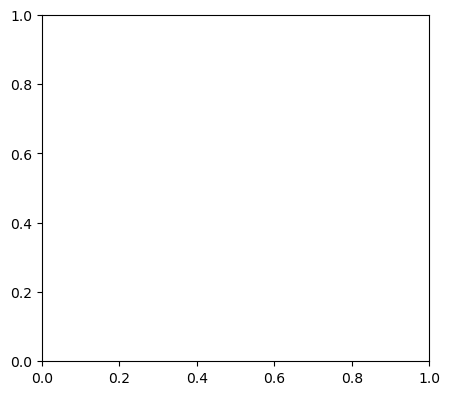

In [6]:
df_001 = df[np.isclose(df["ionic to electronic conductivity ratio (kr)"], 0.01)]
fig, ax = plt.subplots(figsize=(5, 4.5))
for wa in wagner_nums:
    df_ = df_001[np.isclose(df_001['Positive Wagner Number'], wa)]
    ax.plot(df_['eps_am'], df_['Total resistance [Ω.cm2]'], label=f'Wa = {wa}')
ax.set_box_aspect(1)
ax.legend()
ax.set_ylabel(r'R [$\Omega\mathrm{cm}^2$]', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel(r'$\varepsilon_{\mathrm{+ve\ AM}}$', fontdict={'fontsize': 'xx-large'})
plt.tight_layout()
plt.savefig(f'figures/reaction_distribution/resistance-kr0.01.png', bbox_inches="tight")

### $\frac{\kappa}{\sigma}$ = 1

In [ ]:
df_1 = df[np.isclose(df["ionic to electronic conductivity ratio (kr)"], 1)]
fig, ax = plt.subplots(figsize=(5, 4.5))
for wa in wagner_nums:
    df_ = df_1[np.isclose(df_1['Positive Wagner Number'], wa)]
    ax.plot(df_['eps_am'], df_['Total resistance [Ω.cm2]'])
ax.set_box_aspect(1)
ax.legend()
ax.set_ylabel(r'R [$\Omega\mathrm{cm}^2$]', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel(r'$\varepsilon_{\mathrm{+ve\ AM}}$', fontdict={'fontsize': 'xx-large'})
plt.tight_layout()
plt.savefig(f'figures/reaction_distribution/resistance-kr1.png', bbox_inches="tight")

### $\frac{\kappa}{\sigma}$ = 100

In [ ]:
df_100 = df[np.isclose(df["ionic to electronic conductivity ratio (kr)"], 100)]
fig, ax = plt.subplots(figsize=(5, 4.5))
for wa in wagner_nums:
    df_ = df_100[np.isclose(df_100['Positive Wagner Number'], wa)]
    ax.plot(df_['eps_am'], df_['Total resistance [Ω.cm2]'])
ax.set_box_aspect(1)
ax.legend()
ax.set_ylabel(r'R [$\Omega\mathrm{cm}^2$]', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel(r'$\varepsilon_{\mathrm{+ve\ AM}}$', fontdict={'fontsize': 'xx-large'})
plt.tight_layout()
plt.savefig(f'figures/reaction_distribution/resistance-kr100.png', bbox_inches="tight")